# Bussiness Case:
     Effect of advertisement spend on sales, Amount spend on TV, Radio, Newspaper ads and what's the effect on sales

# DataSet overview

### Adverstiment Dataset
>The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles 
>like radio, tv and newspaper.

### Attribution Descriptions
>TV - Spend on TV Advertisements <br>
>Radio - Spend on radio Advertisements <br>
>Newspaper - Spend on newspaper Advertisements <br>
>Sales - Sales revenue generated <br>
Note: The amounts are in diffrent units

# Import the Packages

In [265]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import pylab
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.externals import joblib

# Import the DataSet

In [43]:
df = pd.read_csv('Advertising.csv')
print('Dataset shape is {}'.format(df.shape))
df.head()

Dataset shape is (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [54]:
# Types of colums
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [44]:
# Finding missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [45]:
report = pandas_profiling.ProfileReport(df)
report

# Data Audit Report

In [46]:
def summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(),
                      x.quantile(0.1), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95),
                      x.quantile(0.99), x.max()], index = ['count', 'missing', 'sum', 'mean', 'median', 'Standard deviation',
                                                            'variance', 'minimum', '10th percentile',
                                                            '25th percentile', '50th percentile', '75th percentile',
                                                           '90th percentile', '95 percentile', '99th percentile', 'maximum'])

df.apply(summary).T

,count,missing,sum,mean,median,Standard deviation,variance,minimum,10th percentile,25th percentile,50th percentile,75th percentile,90th percentile,95 percentile,99th percentile,maximum
TV,200.0,0.0,29408.5,147.0425,149.75,85.854236,7370.949893,0.7,24.88,74.375,149.75,218.825,261.44,280.735,292.907,296.4
Radio,200.0,0.0,4652.8,23.2640,22.90,14.846809,220.427743,0.0,3.40,9.975,22.90,36.525,43.52,46.810,49.400,49.6
Newspaper,200.0,0.0,6110.8,30.5540,25.75,21.778621,474.308326,0.3,5.99,12.750,25.75,45.100,59.07,71.825,89.515,114.0
Sales,200.0,0.0,2804.5,14.0225,12.90,5.217457,27.221853,1.6,7.96,10.375,12.90,17.400,21.71,23.800,25.507,27.0


### Handling Outliers

In [50]:
def outlier(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

df = df.apply(outlier)

# Exploring data (VIsualization)

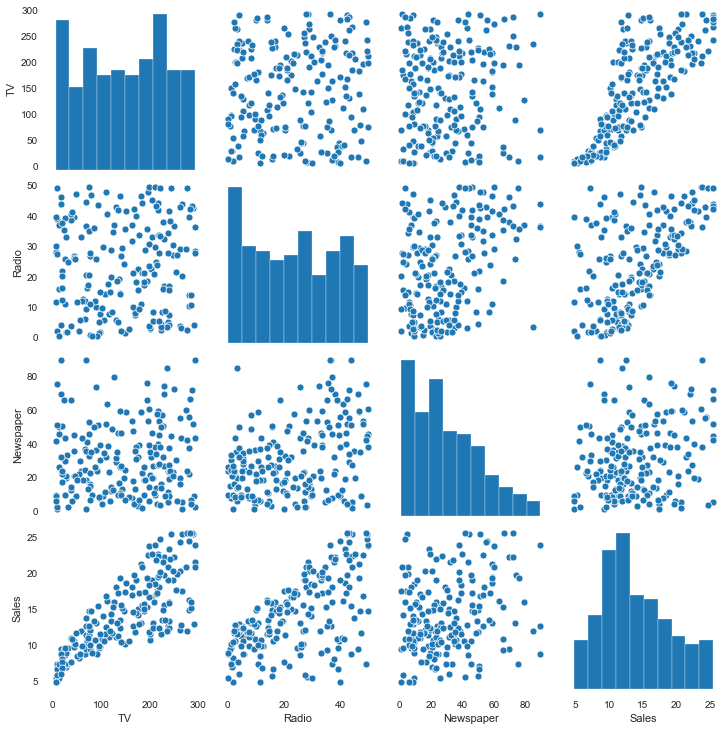

In [57]:
sns.pairplot(df)
plt.show()

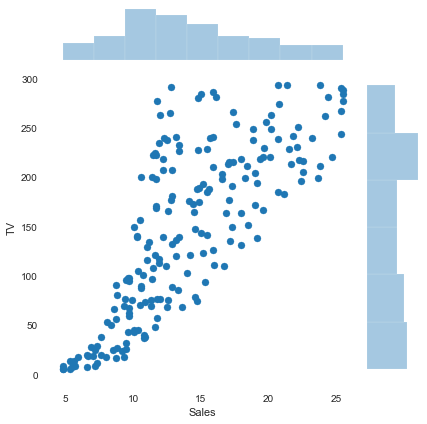

In [71]:
sns.jointplot(x = df.Sales, y = df.TV)
plt.show()

> When the TV ads spend increases the Sales is also increasing, so we know that Tv spend is more affecting the sales

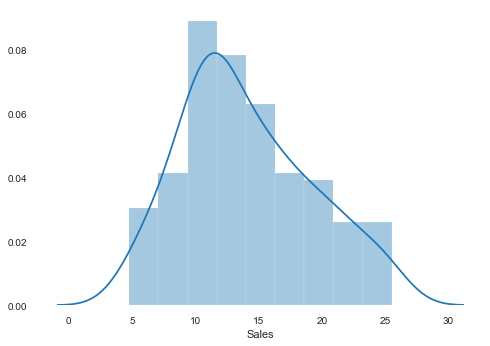

In [77]:
sns.distplot(df.Sales)
plt.show()

> From the above graph, We know that the target variable(sales) is Normally distributed

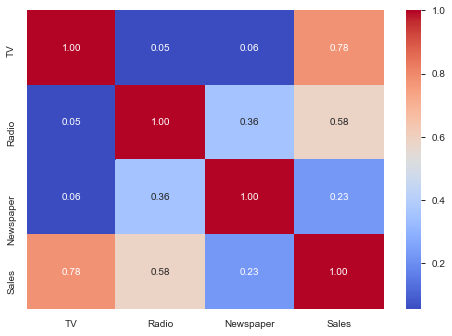

In [88]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

> We know that Newspaper and sales is not highly correleated each other

# Model Building

### Stats model

In [108]:
formula = 'Sales~'+ '+'.join(df.columns.difference(['Sales']))
formula

'Sales~Newspaper+Radio+TV'

In [111]:
ols_model = smf.ols(formula = formula, data = df).fit()

In [112]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     620.5
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          9.22e-100
Time:                        18:53:00   Log-Likelihood:                -375.70
No. Observations:                 200   AIC:                             759.4
Df Residuals:                     196   BIC:                             772.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0753      0.297     10.349      0.0

> Here we know that newspaper is having high p-value ie.greater than 0.05, so drop that variable and again build the model

In [114]:
formula = 'Sales~'+ '+'.join(df.columns.difference(['Sales', 'Newspaper']))
formula

'Sales~Radio+TV'

In [115]:
ols_model = smf.ols(formula = formula, data = df).fit()

In [116]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     934.3
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          2.96e-101
Time:                        18:55:04   Log-Likelihood:                -375.81
No. Observations:                 200   AIC:                             757.6
Df Residuals:                     197   BIC:                             767.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0306      0.280     10.832      0.0

### Predicting the values

In [162]:
ols_predict = ols_model.predict()

### Calculate the Metrics

In [166]:
mse = metrics.mean_absolute_error(df.Sales, ols_predict)
mse

1.216355428625704

In [167]:
rmse = np.sqrt(mse)
rmse

1.1028850477840852

### Get the residuals and plot 

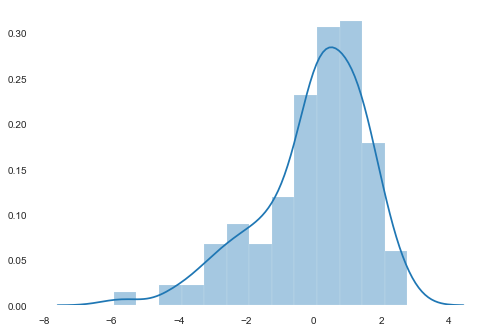

In [168]:
sns.distplot(ols_model.resid)
plt.show()

> The residuals(errors) are slightly right skewed but normally distributed.

# Sklearn Model

### Split Train Test

In [141]:
x = df[df.columns.difference(['Sales'])]
y = df['Sales']

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

### Model Building

In [151]:
sk_model = LinearRegression().fit(x_train, y_train)

In [155]:
# Find coefficient 
sk_model.coef_

array([-0.00111887,  0.18623189,  0.04601212])

In [174]:
# Find Intercept
sk_model.intercept_

2.9089932597004786

### Predicting the values

In [200]:
sk_predict_train = sk_model.predict(x_train)
sk_predict_test = sk_model.predict(x_test)

In [203]:
print('Train Score : {}'.format(metrics.r2_score(y_train, sk_predict_train)))
print('Test Score : {}'.format(metrics.r2_score(y_test, sk_predict_test)))

Train Score : 0.895909864104413
Test Score : 0.9248096897523884


In [262]:
result_train = pd.DataFrame({'Actual': y_train, 'Predicted': sk_predict_train})
result_test = pd.DataFrame({'Actual': y_test, 'Predicted': sk_predict_test})
result_train.head()

,Actual,Predicted
81,12.3,14.664964
107,8.7,7.116838
112,14.1,13.858608
145,10.3,9.708264
8,4.8,3.694666


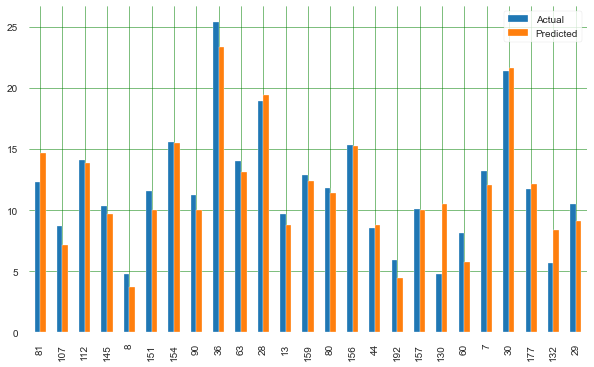

In [264]:
df1 = result_train.head(25)

df1.plot(kind = 'bar', figsize = (10,6))
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5, color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5, color = 'black')
plt.show()

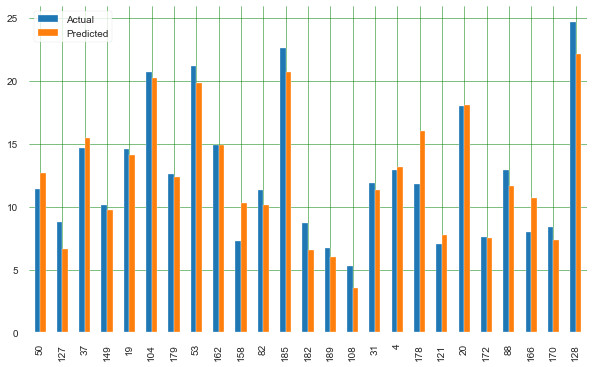

In [210]:
df2 = result_test.head(25)

df2.plot(kind = 'bar', figsize = (10,6))
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5, color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5, color = 'black')
plt.show()

### Get the Residuals and plot

In [212]:
residual_test = y_test - sk_predict_test

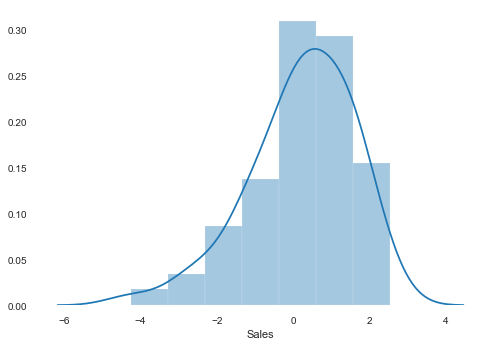

In [214]:
sns.distplot(residual_test)
plt.show()

> Here also the residuals are normally distributed

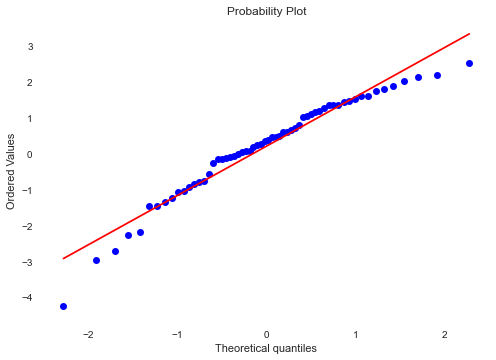

In [220]:
stats.probplot(residual_test, dist = 'norm', plot = pylab)
pylab.show()

# K-fold Cross Validation

In [274]:
cv = cross_val_score(LinearRegression(), x_train, y_train, scoring = 'r2', cv = 10)   # RandomForestRegressor()
cv

array([0.9255041 , 0.76757217, 0.87016751, 0.87976628, 0.80508123,
       0.85732758, 0.89491004, 0.90924411, 0.89851816, 0.94594898])

In [275]:
cv.mean()

0.8754040155688875

# Export the Model

In [241]:
joblib.dump(sk_model, 'sk_model.pkl')

['sk_model.pkl']

# Load the Model

In [242]:
model_clone = joblib.load('sk_model.pkl')